In [1]:
import os
os.chdir('/pi/zhiping.weng-umw/data/ramirezc/splice-benchmark/spliceai/reproduce_eval/')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pickle_serialize import save
from pickle_serialize import load
from gene_centric_gencode_evaluator import GencodeSpliceSiteEvaluator

2025-02-07 03:46:30.649813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738917990.666569  587791 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738917990.671732  587791 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-07 03:46:30.687893: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# # Initialize evaluator
# evaluator = GencodeSpliceSiteEvaluator(
#     gencode_gtf="gencode.v24.chr_patch_hapl_scaff.basic.annotation.gtf",
#     fasta_file="GRCh38.primary_assembly.genome.fa"
# )

# Initialize evaluator
evaluator = GencodeSpliceSiteEvaluator(
    gencode_gtf="gencode.v24lift37.basic.annotation.gtf",
    fasta_file="GRCh37.primary_assembly.genome.fa"
)

# Generate ground truth from GENCODE
tsv_file = "gencode_test.tsv"
gene_names = evaluator.get_gene_names_from_tsv(tsv_file)
acceptor_truth, donor_truth = evaluator.parse_gencode(gene_names=gene_names)

# save(acceptor_truth, "acceptor_truth")
# save(donor_truth, "donor_truth")

# # Generate predictions using SpliceAI
# acceptor_pred, donor_pred = evaluator.generate_spliceai_predictions(acceptor_truth)

# save(acceptor_pred, "splice_ai_acceptor_pred")
# save(donor_pred, "splice_ai_donor_pred")

INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_type', 'gene_status', 'gene_name', 'transcript_type', 'transcript_status', 'transcript_name', 'level', 'tag', 'transcript_support_level', 'havana_gene', 'havana_transcript', 'remap_num_mappings', 'remap_status', 'remap_target_status', 'exon_number', 'exon_id', 'remap_original_location', 'ont', 'protein_id', 'ccdsid', 'remap_substituted_missing_target']


In [4]:
# Load saved predictions 
acceptor_pred, donor_pred = evaluator.load_predictions(
    "predictions/acceptor_pred.pkl",
    "predictions/donor_pred.pkl",
)

# Get metrics including top-k accuracy
acc_precision, acc_recall, acc_auprc, acc_topk = evaluator.calculate_metrics(
    acceptor_truth, acceptor_pred
)
don_precision, don_recall, don_auprc, don_topk = evaluator.calculate_metrics(
    donor_truth, donor_pred  
)

/tmp/ipykernel_587791/2584306947.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("auprc_topk_spliceai.png", dpi=300)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


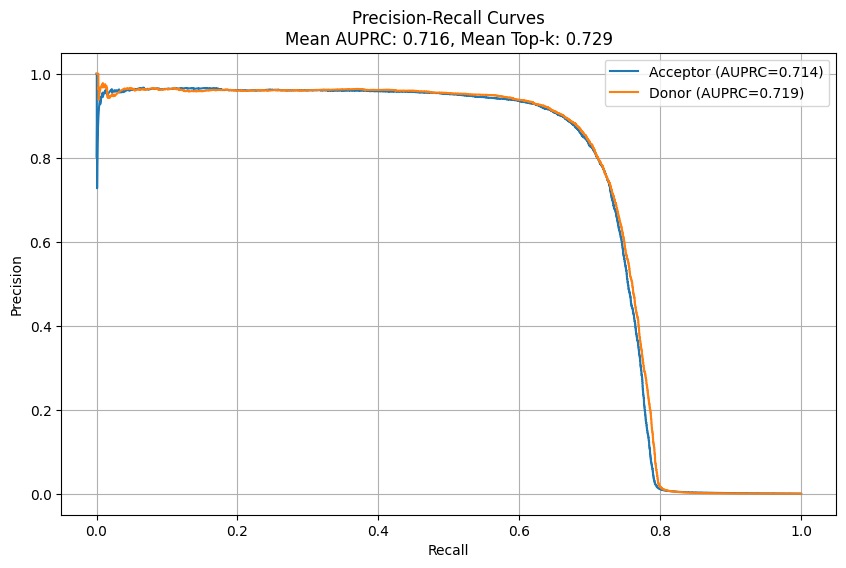

Acceptor AUPRC: 0.7137, Top-k: 0.7288
Donor AUPRC: 0.7189, Top-k: 0.7300
Mean AUPRC: 0.7163, Mean Top-k: 0.7294


In [5]:
# Calculate mean metrics
mean_auprc = (acc_auprc + don_auprc) / 2
mean_topk = (acc_topk + don_topk) / 2

# Plot precision-recall curves
plt.figure(figsize=(10, 6))
plt.plot(acc_recall, acc_precision, label=f'Acceptor (AUPRC={acc_auprc:.3f})')
plt.plot(don_recall, don_precision, label=f'Donor (AUPRC={don_auprc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curves\nMean AUPRC: {mean_auprc:.3f}, Mean Top-k: {mean_topk:.3f}')
plt.legend()
plt.grid(True)
plt.savefig("auprc_topk_spliceai.png", dpi=300)
plt.show()

# Print results
print(f"Acceptor AUPRC: {acc_auprc:.4f}, Top-k: {acc_topk:.4f}")
print(f"Donor AUPRC: {don_auprc:.4f}, Top-k: {don_topk:.4f}")
print(f"Mean AUPRC: {mean_auprc:.4f}, Mean Top-k: {mean_topk:.4f}")

In [6]:
# !jupyter nbconvert --to python Splice/SpliceAI/spliceai/evaluate_sptransform_gene_centric_gencode.ipynb
!python3 --version

64.03s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Python 3.10.12


In [2]:
import os
os.chdir('/pi/zhiping.weng-umw/data/ramirezc/splice-benchmark/spliceai/models')

import tensorflow as tf
from tensorflow.keras.models import load_model

def convert_to_legacy(model_path, output_path):
    # Load with newer Keras
    model = load_model(model_path)
    
    # Compile the model with the original configuration
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    # Save in older format with compilation info
    model.save(output_path, include_optimizer=True)

# Convert each model
for i in range(1, 6):
    input_path = f'spliceai{i}.h5'
    output_path = f'spliceai{i}_legacy.h5'
    convert_to_legacy(input_path, output_path)

2025-01-25 22:50:08.302505: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
